# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
# YOUR CODE HERE
df = pd.read_csv('https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/iris/iris.tsv.gz', sep='\t')
df.sample(10)

,sepal-length,sepal-width,petal-length,petal-width,target
136,7.2,3.2,6.0,1.8,2
3,7.7,3.8,6.7,2.2,2
93,6.4,2.8,5.6,2.2,2
4,7.2,3.0,5.8,1.6,2
44,4.8,3.4,1.9,0.2,0
147,5.1,3.4,1.5,0.2,0
85,4.6,3.4,1.4,0.3,0
66,6.1,2.8,4.7,1.2,1
20,5.2,2.7,3.9,1.4,1
43,5.1,3.5,1.4,0.2,0


### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [4]:
cols = list(df.columns)
col_descriptions = [
   "sepal-length represents the length of the flower's sepal, a part of a flower that provides protection and supports the petals",
   "sepal-width represents the width of the flower's sepal, a part of a flower that provides protection and supports the petals",
   "petal-length represents the length of the flower's petal, a typically bright colored part of a flower that surrounds the reproductive parts of the flower",
   "petal-width represents the width of the flower's petal, a typically bright colored part of a flower that surrounds the reproductive parts of the flower",
   "target represents the species of a flower, encoded as an integer"
]
for c, d in zip(cols, col_descriptions, strict=True):
    print(f"column: {c}, description: {d}\n")

column: sepal-length, description: sepal-length represents the length of the flower's sepal, a part of a flower that provides protection and supports the petals

column: sepal-width, description: sepal-width represents the width of the flower's sepal, a part of a flower that provides protection and supports the petals

column: petal-length, description: petal-length represents the length of the flower's petal, a typically bright colored part of a flower that surrounds the reproductive parts of the flower

column: petal-width, description: petal-width represents the width of the flower's petal, a typically bright colored part of a flower that surrounds the reproductive parts of the flower

column: target, description: target represents the species of a flower, encoded as an integer



### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

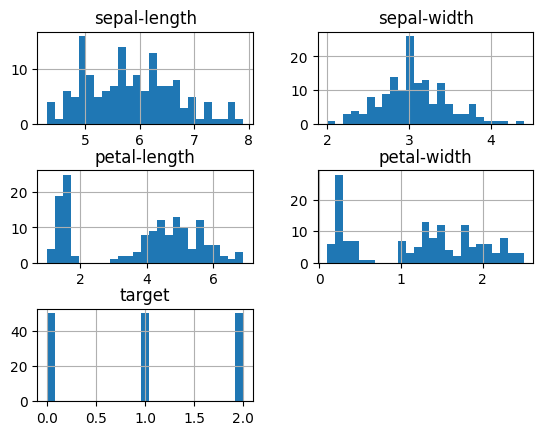

In [5]:
_ = df.hist(bins=25)
plt.subplots_adjust(hspace=.5)

In [6]:
df.skew()

sepal-length    0.314911
sepal-width     0.334053
petal-length   -0.274464
petal-width    -0.104997
target          0.000000
dtype: float64

sepal-length: Positive/Right skewed unimodal distribution

sepal-width: Positive/Right skewed unimodal distribution

petal-length: Negative/left skewed multimodal distribution with peaks around 1 and 5

petal-width: Negative/left skewed multimodal distribution with a large peak around .2 and smaller peaks around roughly 1.5 and 2

target: Multimodal distribution with 3 classes

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

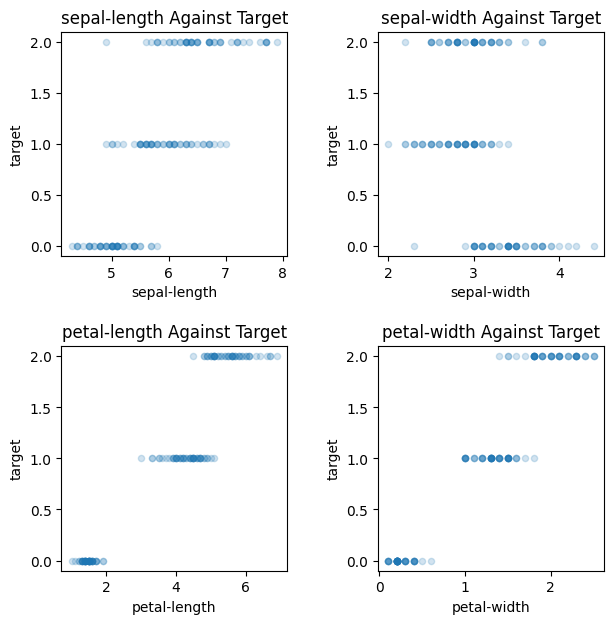

In [7]:
plot_columns = [c for c in df.columns if c != "target"]
num_cols = 2
num_rows = (len(plot_columns) + num_cols - 1) // num_cols

plt.figure(figsize=(num_cols*3.5, num_rows*3.5))
for (i, c) in enumerate(plot_columns):
    plt.subplot(num_rows, num_cols, i+1)
    df.plot.scatter(c, "target", alpha=.2, ax=plt.gca())
    
    plt.xlabel(c)
    plt.ylabel("target")
    plt.title(f"{c} Against Target")
plt.subplots_adjust(wspace=.4, hspace=.4)

sepal-length and the target are dependent. We can see a clear separation of the target; sepal-lengths between approximately 4-6 correspond to target 0, between 5-7 to target 1, between 5.5-8 to target 2. There is more overlap in this combination than the petal features, suggesting the relationship is not as strong. I believe this feature and the target are dependent since different species will have evolved to have different sized sepals. This relationship may not be as strong as others since the main goal of this part of the plant is to protect reproductive parts of the plant. If those parts are similar sizes between the species, then the sepal length may not vary as much as other features.

sepal-width and the target are dependent. We can see a clear separation of the target; sepal-width between approximately 3-4.5 correspond to target 0, between 2-3.5 to target 1, between 2.5-3.5 to target 2. There is more overlap in this combination than the petal features, suggesting the relationship is not as strong. Similar to sepal-length, it makes sense that this relationship is dependent and not as strong as the petal features since the main goal of this part of the plant is to protect reproductive parts of the plant rather than distinguish itself to attract pollinators. 

petal-length and the target are dependent. We can see a clear separation of the target; petal-lengths between approximately 1-2 correspond to target 0, between 3.5-5 to target 1, between 5-7 to target 2. This combination has the strongest separation of the target. I believe this feature and the target are dependent since different species will have evolved to have different sized petals to attract polinators. The petals are often the most distinctive part of a plant, so it makes sense that this is a strong indicator of the species.

petal-width and the target are dependent. We can see a clear separation of the target; petal-widths between approximately 0-.5 correspond to target 0, between 1-2 to target 1, between 1.5-2.5 to target 2. I believe this feature and the target are dependent since different species will have evolved to have different sized petals. Similar to the length, it makes sense that this feature separates the target well since petals widely vary for different flowers.

In summary, all 4 input features are dependent with the target

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

In [8]:
lin_reg = sklearn.linear_model.LinearRegression()
X = df.drop("target", axis=1)
y = df["target"]
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

In [9]:
mse = sklearn.metrics.mean_squared_error(y_true=y, y_pred=y_pred)
mse

0.046385088311226945

The MSE of the model over the whole data set is 0.046385088311226945

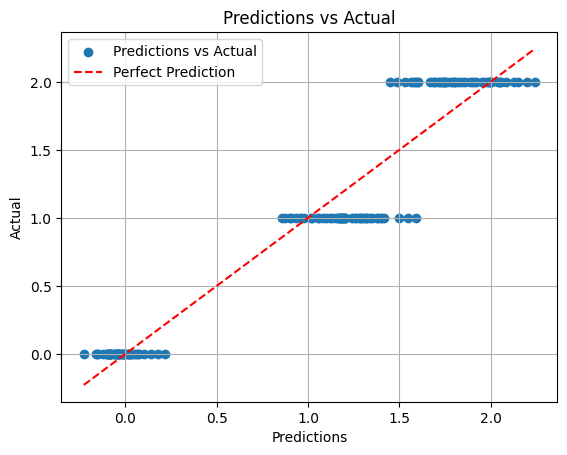

In [10]:
plt.scatter(y_pred, y, label="Predictions vs Actual")

min_val = min(y.min(), y_pred.min())
max_val = max(y.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

plt.title("Predictions vs Actual")
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.legend()
plt.grid()
None

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


Linear Regression built on feature sepal-length Mean Squared Error: 0.2583986123119253
Linear Regression built on feature sepal-width Mean Squared Error: 0.5493765900582832
Linear Regression built on feature petal-length Mean Squared Error: 0.06621216537347084
Linear Regression built on feature petal-width Mean Squared Error: 0.05678463583919234


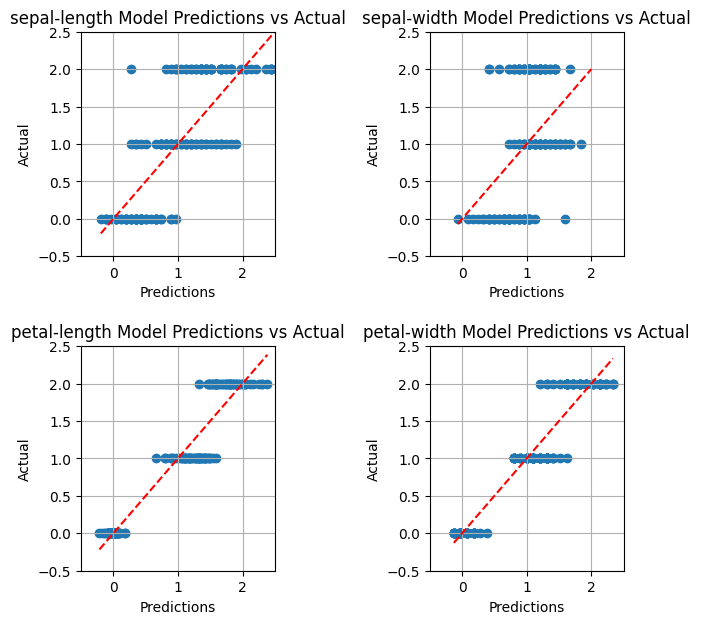

In [11]:
num_cols = 2
num_rows = (len(plot_columns) + num_cols - 1) // num_cols
plt.figure(figsize=(num_cols*3.5, num_rows*3.5))

for (i, c) in enumerate(X.columns):
    single_feature_df = pd.DataFrame(df[c])
    lin_reg = sklearn.linear_model.LinearRegression()
    lin_reg.fit(single_feature_df, y)
    y_pred = lin_reg.predict(single_feature_df)
    mse = sklearn.metrics.mean_squared_error(y_true=y, y_pred=y_pred)
    print(f"Linear Regression built on feature {c} Mean Squared Error: {mse}")

    plt.subplot(num_rows, num_cols, i+1)
    plt.scatter(y_pred, y, label="Predictions vs Actual")

    min_val = min(y.min(), y_pred.min())
    max_val = max(y.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')
    
    plt.xlabel("Predictions")
    plt.ylabel("Actual")
    plt.title(f"{c} Model Predictions vs Actual")
    plt.grid()
    plt.xlim(-.5,2.5)
    plt.ylim(-.5,2.5)
plt.subplots_adjust(wspace=.8, hspace=.4)

The petal-width model performed the closest to the model trained on all features:

Model trained with only petal-width on entire dataset: 0.05678463583919234 MSE

Model trained with all features on entire dataset: 0.046385088311226945 MSE

This shows that the petal width is the best predictor of the target, though does not explain all of the variance. When incorporating the other features, the performance sees a lift

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

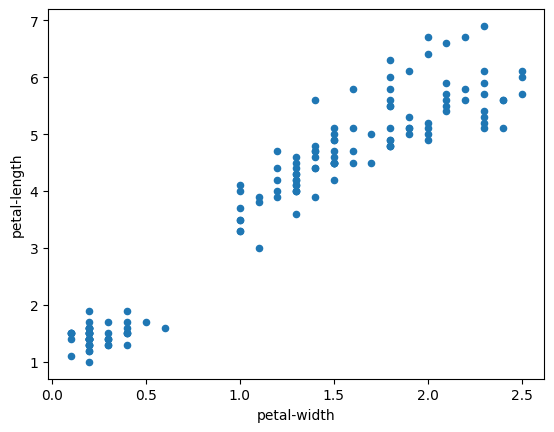

In [12]:
_ = df.plot.scatter("petal-width", "petal-length")

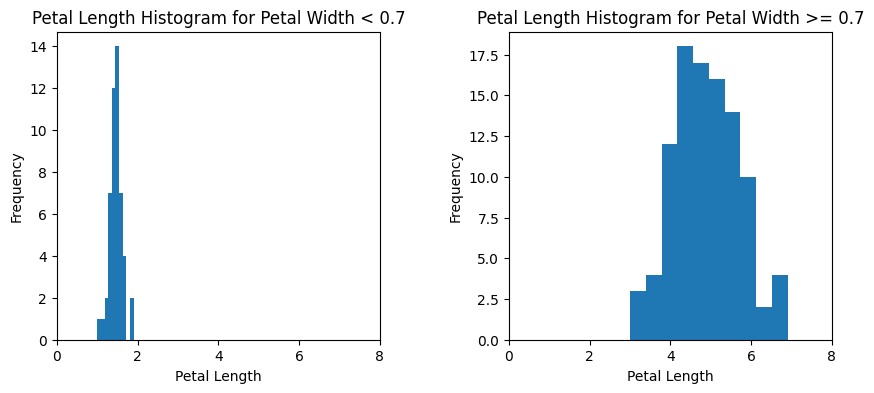

In [13]:
# Lets choose threshold .7 since it is where the data has a clear split
threshold = .7
below_threshold_df = df[df['petal-width'] < .7]
above_threshold_df = df[df['petal-width'] >= .7]

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(below_threshold_df['petal-length'])
plt.title("Petal Length Histogram for Petal Width < 0.7")
plt.xlabel("Petal Length")
plt.ylabel("Frequency")
plt.xlim(0,8)

plt.subplot(1, 2, 2)
plt.hist(above_threshold_df['petal-length'])
plt.title("Petal Length Histogram for Petal Width >= 0.7")
plt.xlabel("Petal Length")
plt.ylabel("Frequency")
plt.xlim(0,8)

plt.subplots_adjust(wspace=.4)

We can see in the two histograms that the threshold of 0.7 creates a clear separation in the values of Petal Length.

For Petal Width < 0.7, we see Petal Lengths range from around 1.0 to 1.9

For Petal Width >= 0.7, we see Petal Lengths range from around 3.0 to 6.9

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

#### PCA Analysis

##### PCA Visualizations

###### Fitting PCA Model with all Components

First we will plot some visualizations utilizing a PCA model trained with all components for later comparison with the 2 component PCA

In [14]:
pca_reg_pipe = make_pipeline(StandardScaler(), PCA(random_state=42), LinearRegression())
pca_reg_pipe.fit(X, y)
pca = pca_reg_pipe.steps[1][1]

In [15]:
pca_components_df = pd.DataFrame(pca.components_, columns=X.columns)
pca_components_df

,sepal-length,sepal-width,petal-length,petal-width
0,0.522372,-0.263355,0.581254,0.565611
1,0.372318,0.925556,0.021095,0.065416
2,0.721017,-0.242033,-0.140892,-0.633801
3,-0.261996,0.124135,0.801154,-0.523546


###### PCA Explained Variance

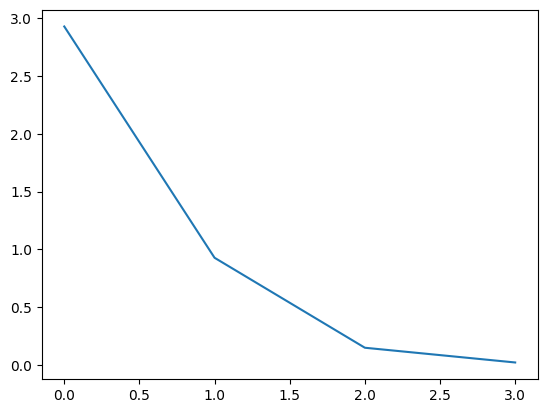

In [16]:
_ = plt.plot(pca.explained_variance_)

In [17]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

We can see that the first two components explain the majority of the variance (Over 95%). But there is still some variance explained by the final two components as well

In [18]:
y_pred_all_components = pca_reg_pipe.predict(X)
sklearn.metrics.mean_squared_error(y_pred_all_components, y)

0.04638508831122696

We can see that the LinearRegression with Standard Scaling and PCA applied has a MSE of 0.04638508831122696 when trained and tested on the entire dataset

###### Projecting the Normalized PCA

In [19]:
color_map = {
    0: "blue",
    1: "red",
    2: "green",
}
df_normalized = df[X.columns] / df[X.columns].std()
df_normalized.std()

sepal-length    1.0
sepal-width     1.0
petal-length    1.0
petal-width     1.0
dtype: float64

In [20]:
df_projected = df_normalized[X.columns] @ pca_components_df.iloc[:2].T

###### Plotting the Normalized PCA

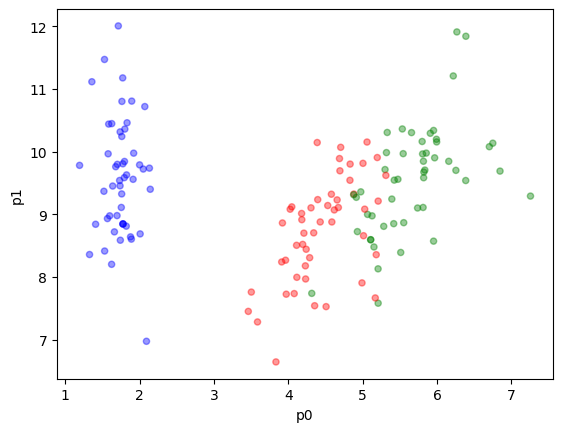

In [21]:
df_projected.plot.scatter(0, 1, alpha=.4, color=df['target'].map(color_map))
plt.xlabel("p0")
plt.ylabel("p1")
None

##### PCA on First Half of Components

In [22]:
pca_reg_pipe_first_half = make_pipeline(StandardScaler(), PCA(random_state=42, n_components=2), LinearRegression())
pca_reg_pipe_first_half.fit(X, y)
pca_first_half = pca_reg_pipe_first_half.steps[1][1]

In [23]:
pca_first_half_components_df = pd.DataFrame(pca_first_half.components_, columns=X.columns)
pca_first_half_components_df

,sepal-length,sepal-width,petal-length,petal-width
0,0.522372,-0.263355,0.581254,0.565611
1,0.372318,0.925556,0.021095,0.065416


In [24]:
pca_first_half.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [25]:
sum(pca_first_half.explained_variance_ratio_)

np.float64(0.9580097536148199)

The variance explained by the first half of the principal components is 0.9580097536148198

In [26]:
y_pred = pca_reg_pipe_first_half.predict(X)
sklearn.metrics.mean_squared_error(y_pred, y)

0.07146725091639043

The Mean Squared Error of the Linear Regression model is 0.07146725091639042

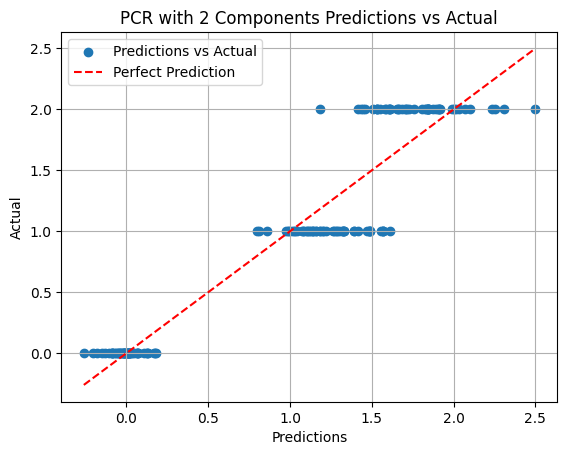

In [27]:
min_val = min(y.min(), y_pred.min())
max_val = max(y.max(), y_pred.max())

plt.scatter(y_pred, y, label="Predictions vs Actual")
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')
plt.title("PCR with 2 Components Predictions vs Actual")
plt.xlabel("Predictions")
plt.ylabel("Actual")

plt.legend()
plt.grid()
None

The MSE of the Linear Regression trained on the whole dataset after applying the StandardScaler and PCA with half of the components (2) is 0.07146725091639042

In comparison:

The Linear Regression trained on the whole dataset with only the petal-width feature with no scaling applied: 0.05678463583919234 MSE

The Linear Regression trained with all features on entire dataset with no scaling applied: 0.046385088311226945 MSE

The results show that the StandardScaler and PCA with 2 components did not perform as well as only applying LinearRegression. My hypothesis is that this is due to limiting the number of components.

To prove this hypothesis, I trained a similar model, applying StandardScaler, PCA with all components, and a LinearRegression. This model resulted in 0.046385088311226945 MSE, perfectly matching the LinearRegression trained with all features with no scaling or PCA. This proves that the number of components has a direct relation to the resulting MSE of the LinearRegression. This is likely because some dimensionality is lost when reducing the number of components to only the first half. Additionally, since this model performance matches the LinearRegression performance without PCA, we know that the dimensionality reduction did not result in a decrease in performance. Therefore, the reduced number of components with PCA was not able to explain all the variance, contributing to the predictions being less accurate than exclusively using LinearRegression.

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [28]:
corr = df.corr(numeric_only=True)
corr

,sepal-length,sepal-width,petal-length,petal-width,target
sepal-length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal-width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal-length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal-width,0.817954,-0.356544,0.962757,1.000000,0.956464
target,0.782561,-0.419446,0.949043,0.956464,1.000000


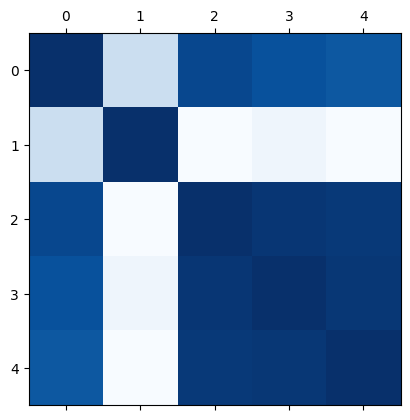

In [29]:
_ = plt.matshow(corr, cmap="Blues")

We can see that the highest correlation is between petal-length and petal-width, with 0.962757. 

This correlation is close to 1, indicating that it is a very strong correlation. 

Since these features are extremely correlated, they will vary in the same direction. This means that when applied to principal components analysis, these features will dominate the first component since they are almost redundant. Additionally, this first component should be able to mostly capture the variance of these two features, reducing the dimensionality of the dataset without losing information. 

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

##### Outlier Detection with Mahalanobis Distance

Chi-square cutoff (p=4, 0.975): 11.143
Number of outliers:  6 / 150 (4.00% of the data)


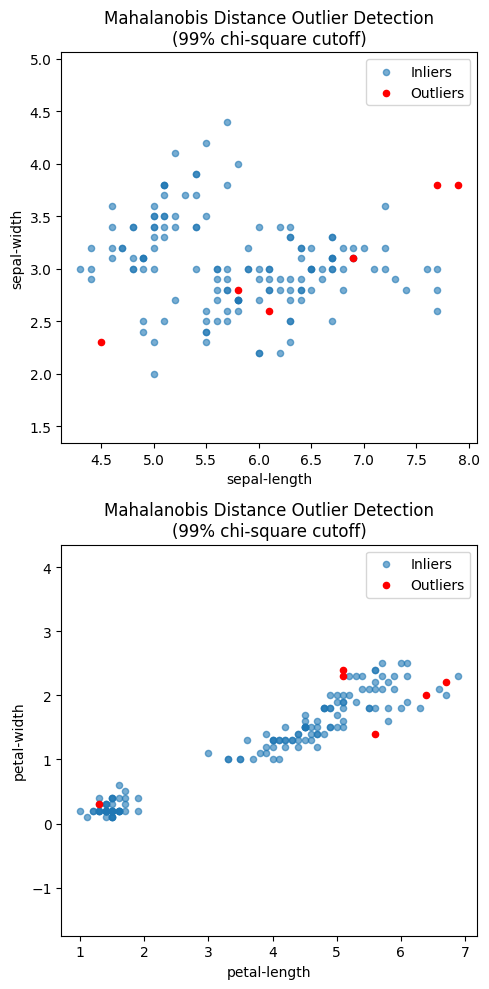

In [30]:
from scipy.stats import chi2

X_np = X.to_numpy()
N = len(X_np)

# -----------------------------
# Mahalanobis distances
# -----------------------------
# Mean and covariance of the full sample
mu = X_np.mean(axis=0)
Sigma = np.cov(X_np, rowvar=False)
Sigma_inv = np.linalg.inv(Sigma)

# Centered data
diff = X_np - mu

# Squared Mahalanobis distance for each point:
# D_M(x)^2 = (x - mu)^T Sigma^{-1} (x - mu)
MD2 = np.sum(diff @ Sigma_inv * diff, axis=1)

# -----------------------------
# Chi-square cutoff (97.5%)
# -----------------------------
p = X_np.shape[1]                   # number of features (here p = 2)
cutoff = chi2.ppf(0.975, df=p)   # chi^2_{p, 0.975}

outliers = MD2 > cutoff          # boolean mask

num_outliers = np.sum(outliers)
percent_outliers = 100 * num_outliers / N

# -----------------------------
# Plot inliers vs outliers
# -----------------------------
plt.figure(figsize=(5, 10))

plt.subplot(2, 1, 1)
plt.scatter(X_np[~outliers, 0], X_np[~outliers, 1],
            alpha=0.6, label="Inliers",s=20)
plt.scatter(X_np[outliers, 0], X_np[outliers, 1],
            c="red",  label="Outliers",s=20)
plt.xlabel("sepal-length")
plt.ylabel("sepal-width")
plt.title("Mahalanobis Distance Outlier Detection\n(99% chi-square cutoff)")
plt.legend()
plt.axis("equal")
plt.tight_layout()


plt.subplot(2, 1, 2)
plt.scatter(X_np[~outliers, 2], X_np[~outliers, 3],
            alpha=0.6, label="Inliers",s=20)
plt.scatter(X_np[outliers, 2], X_np[outliers, 3],
            c="red",  label="Outliers",s=20)
plt.xlabel("petal-length")
plt.ylabel("petal-width")
plt.title("Mahalanobis Distance Outlier Detection\n(99% chi-square cutoff)")
plt.legend()
plt.axis("equal")
plt.tight_layout()

print(f"Chi-square cutoff (p={p}, 0.975): {cutoff:.3f}")
print(f"Number of outliers:  {num_outliers} / {N} "
      f"({percent_outliers:.2f}% of the data)")

I will first list the possible outlier rows, and then chose the greatest Mahalanobis distances as the selected outlier row.

In [31]:
outlier_rows: tuple[int, int] = []

for i, item in enumerate(outliers):
    if item:
        outlier_rows.append((i, MD2[i]))
        print(f"Index {i} is an outlier row")

Index 3 is an outlier row
Index 31 is an outlier row
Index 33 is an outlier row
Index 57 is an outlier row
Index 60 is an outlier row
Index 62 is an outlier row


In [32]:
# Finding the Max Mahalanobis distance
max = 0
max_index = 0
for i, item in enumerate(MD2):
    if item > max:
        max = item
        max_index = i
print(f"The Row with the Maximum Squared Mahalanobis distance is index {max_index}. It's MD2 was {max}")
print("The other rows had the following MD")
[print(f"Index: {i}, MD2: {item}") for (i, item) in outlier_rows if i != 33]
None

The Row with the Maximum Squared Mahalanobis distance is index 33. It's MD2 was 13.140199194494324
The other rows had the following MD
Index: 3, MD2: 12.860300621359565
Index: 31, MD2: 11.386751131338075
Index: 57, MD2: 11.394148424625111
Index: 60, MD2: 12.465814024833307
Index: 62, MD2: 12.886987379159926


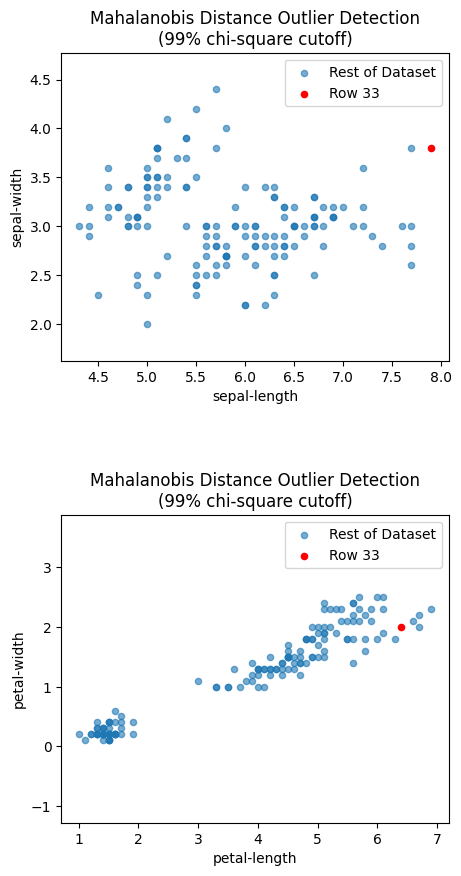

In [33]:
outlier_row = X.iloc[33]
remaining_X = X.drop(33)

plt.figure(figsize=(5, 10))

plt.subplot(2, 1, 1)
plt.scatter(remaining_X["sepal-length"], remaining_X["sepal-width"],
            alpha=0.6, label="Rest of Dataset",s=20)
plt.scatter(outlier_row["sepal-length"], outlier_row["sepal-width"],
            c="red",  label="Row 33",s=20)
plt.xlabel("sepal-length")
plt.ylabel("sepal-width")
plt.title("Mahalanobis Distance Outlier Detection\n(99% chi-square cutoff)")
plt.legend()
plt.axis("equal")

plt.subplot(2, 1, 2)
plt.scatter(remaining_X["petal-length"], remaining_X["petal-width"],
            alpha=0.6, label="Rest of Dataset",s=20)
plt.scatter(outlier_row["petal-length"], outlier_row["petal-width"],
            c="red",  label="Row 33",s=20)
plt.xlabel("petal-length")
plt.ylabel("petal-width")
plt.title("Mahalanobis Distance Outlier Detection\n(99% chi-square cutoff)")
plt.legend()
plt.axis("equal")

plt.subplots_adjust(hspace=.5)

In [34]:
X.iloc[33]

sepal-length    7.9
sepal-width     3.8
petal-length    6.4
petal-width     2.0
Name: 33, dtype: float64

In [35]:
X.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [36]:
for c in X.columns:
    p = scipy.stats.percentileofscore(X[c], X.iloc[33][c])
    print(f"Percentile of Row 33 for column {c}: {p}")

Percentile of Row 33 for column sepal-length: 100.0
Percentile of Row 33 for column sepal-width: 94.33333333333333
Percentile of Row 33 for column petal-length: 97.33333333333333
Percentile of Row 33 for column petal-width: 83.0


I chose to use Mahalanobis Distance as the outlier detection methodology. This method allows us to examine all the features of the dataset together. Other metrics like z-score or boxplots examine features individually and identify samples which are unusual within a single feature. By utilizing Mahalanobis, we can examine how rows are unusual when all the features are considered together. This is important because the features within this dataset are correlated, so we will be able to see how considering these features together helps to identify joint abnormalities.

I used the cutoff percentile of 0.975 as it allowed for a few samples to be considered as outliers. From there I was able to select the most abnormal sample by ranking the distances. I have selected row 33 as the outlier in this dataset, with a Mahalanobis Distance of 13.140199194494324


Row 33 clearly sticks out from the rest of the dataset, especially in terms of the sepal width and length.

Its sepal-length of 7.9 is the highest in the dataset. The second highest is 7.7 for row 138.

Its sepal-width of 3.8 is in the 94th percentile of the dataset

Its petal-length of 6.4 is in the 97th percentile of the dataset

Its petal-width of 2.0 is in the 83rd percentile of the dataset



### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

None